In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Retirando do dataset de treino as features que não estão presentes no dataset de teste. À exceção da feature target, claro.

colunas = list(test.columns)
colunas.append('NU_NOTA_MT')
df = df[colunas]

In [4]:
df.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


In [5]:
df.isnull().sum().sort_values(ascending = False)

TP_DEPENDENCIA_ADM_ESC    9448
TP_ENSINO                 9448
Q027                      7373
NU_NOTA_MT                3597
NU_NOTA_COMP5             3597
NU_NOTA_LC                3597
TP_STATUS_REDACAO         3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP1             3597
NU_NOTA_REDACAO           3597
NU_NOTA_CH                3389
NU_NOTA_CN                3389
TP_ESCOLA                    0
IN_SURDEZ                    0
IN_CEGUEIRA                  0
IN_BAIXA_VISAO               0
CO_UF_RESIDENCIA             0
IN_TREINEIRO                 0
SG_UF_RESIDENCIA             0
TP_ANO_CONCLUIU              0
TP_NACIONALIDADE             0
NU_IDADE                     0
TP_ST_CONCLUSAO              0
TP_SEXO                      0
IN_DISCALCULIA               0
TP_COR_RACA                  0
IN_DISLEXIA                  0
TP_PRESENCA_LC               0
IN_SABATISTA                 0
IN_GESTANTE                  0
Q026    

In [6]:
# df somente com as features numéricas

df_num = df.select_dtypes(exclude = 'object').columns
test_num = test.select_dtypes(exclude = 'object').columns

In [7]:
# Inputando 0 nos valores missing.

df[df_num] = df.loc[:,df_num].fillna(0)
test[test_num] = test.loc[:,test_num].fillna(0)

In [8]:
# Separando o id e o target antes de realizer one-hot encoding

inscricao_df = df['NU_INSCRICAO']
inscricao_test = test['NU_INSCRICAO']
nota = df['NU_NOTA_MT']

df = df.iloc[:,1:-1]
test = test.iloc[:, 1:]

In [9]:
# One-hot encoding dos datasets de treino e teste juntos (importante para se ter as mesmas features nos dois datasets)

dummies = pd.get_dummies(df.append(test))

In [10]:
# "Devolvendo" os dataframes para df e test
df_lenght = len(df)

df = dummies.iloc[:df_lenght]
test = dummies.iloc[df_lenght:]

df['NU_NOTA_MT'] = nota
df['NU_INSCRICAO'] = inscricao_df
test['NU_INSCRICAO'] = inscricao_test

# Poupando um pouco de memória
del dummies

C:\Users\corad\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\corad\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\corad\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [11]:
rf = RandomForestRegressor()

In [12]:
# Separando em treino e teste

X = df.drop(['NU_NOTA_MT','NU_INSCRICAO'],1)
y = df['NU_NOTA_MT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
df.shape

(13730, 162)

In [14]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
pred = rf.predict(X_test)

In [16]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')

RMSE: 62.17160548139469


In [17]:
rf.score(X_test, y_test)

0.9279015212622892

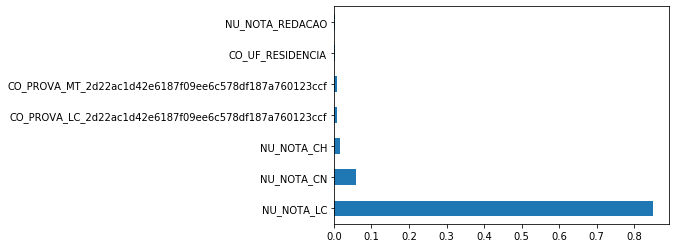

In [18]:
# Feature importances

feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [19]:
# Escolhendo somente as 10 features mais importantes

features = feat_importances.sort_values(ascending = False)[:10].index

In [20]:
X = df[features]
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred))}')

RMSE: 62.17160548139469


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
rf.score(X_test, y_test)

0.9891138954131963

In [23]:
sub = rf.predict(test[features])

In [24]:
test = pd.read_csv('test.csv')

In [25]:
submit = pd.Series(sub, index=test['NU_INSCRICAO'], name='NU_NOTA_MT')

In [26]:
submit.to_csv("answer.csv", header=True)